# Machine Learning: Assignment 4
## Regression methods (max. 10p)

In [226]:
# Write Your information in here
student_name = 'Phat Vuong'
student_email = "ac4933@student.jamk.fi"

## Assignment 4.1: Preprocess the data (2 p)
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [227]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from the provided URL
df = pd.read_csv("garments_worker_productivity.csv")

# Define the background variables to remove
background_vars = ['date', 'quarter', 'department' , 'day', 'team']
df1 = df.drop(columns=background_vars)

# Handle missing values
# For simplicity, fill missing values with the mean of the column (Recomended)
df1['wip'].fillna(df['wip'].mean(), inplace=True) # Fill with mean

# Verify after filling missing values
df1.head()


C:\Users\PHAT\AppData\Local\Temp\ipykernel_48104\3027481097.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['wip'].fillna(df['wip'].mean(), inplace=True) # Fill with mean


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [228]:
# Normalize the data
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Create the 'class' column based on the 'actual_productivity' column
df1['class'] = (df['actual_productivity'] > 0.5).astype(int)


In [229]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df1.columns}')
print(f'First row by position: {df1.iloc[0]}')

Columns: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'class'],
      dtype='object')
First row by position: targeted_productivity    1.000000
smv                      0.450252
wip                      0.047631
over_time                0.273148
incentive                0.027222
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.655172
actual_productivity      0.797332
class                    1.000000
Name: 0, dtype: float64


## Assignment 4.2: Regression using a Linear Regression model (2 p)

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error

# Define features (excluding 'actual_productivity' and 'class')
X = df1.drop(columns=['actual_productivity', 'class'])
y = df1['actual_productivity']

# Split the data into training (67%) and testing data (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

In [231]:
# Create and test Linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict the actual_productivity on the test dataset
y_pred_linear = linear_regressor.predict(X_test)

# Assign predictions to y_pred
y_pred = y_pred_linear

# Calculate explained variance and maximun error for the Linear Regression model
exp_var_linear = explained_variance_score(y_test, y_pred_linear)
max_err_linear = max_error(y_test, y_pred_linear)

In [232]:
# Assign calculated values to required variables
exp_var = exp_var_linear
max_err = max_err_linear

In [233]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')
print(f'Train columns length: {len(X_train.columns)}')
print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_2}')

Test length: 396
Train length: 801
Train columns: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
Train columns length: 9
Predict 5 items: [0.61877796 0.62308229 0.65864016 0.45802464 0.48529904] ... [0.62725341 0.61911627 0.58895113 0.54223115 0.65947342]
Explained variance: 0.23035412343747286
Maximum error: 0.608433388669771
Explained variance (Weighted): 0.23035412343747286


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [251]:
exp_var = explained_variance_score(y_test, y_pred)
exp_var_weighted = explained_variance_score(y_test, y_pred, multioutput='variance_weighted')

exp_var_2 = exp_var_weighted

# TODO: Explained variance
print(f'Explained variance (Weighted): {exp_var}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.3687125444193392
Explained variance (Weighted): 0.3687125444193392


## Assignment 4.3: Classification using Random Forest (2 p)

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define features (excluding 'actual_productivity' and 'class')
X = df1.drop(columns=['actual_productivity', 'class'])
y = df1['class']

# Split the dataset int training (67%) and testing (33%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=2150)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [236]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        49
           1       0.92      0.96      0.94       347

    accuracy                           0.89       396
   macro avg       0.76      0.70      0.73       396
weighted avg       0.88      0.89      0.89       396

[[ 22  27]
 [ 15 332]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [237]:
# The importance of features
feature_importances = rf_classifier.feature_importances_

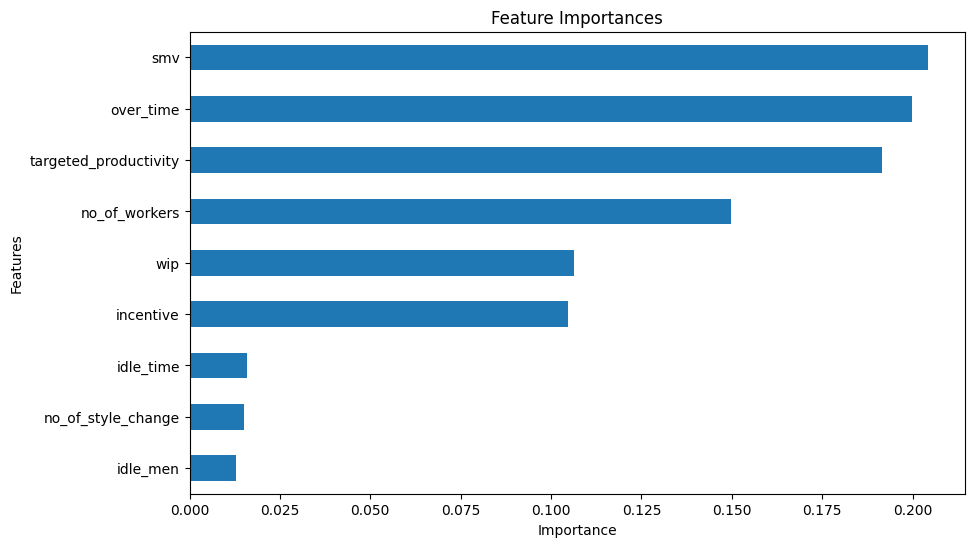

In [238]:
# Visualize feature importance
features = X.columns
importances = pd.Series(feature_importances, index=features)
importances = importances.sort_values()

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Assignment 4.4: Regression using Random Forest Regressor (2 p)

Repeat same than **assignment 4.2** but now using a **Random Forest Regression** method.

Also calculate the *explained variance* and *maximum error*.

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, max_error
import matplotlib.pyplot as plt

# Define features and target
X = df1.drop(columns=['actual_productivity', 'class'])
y = df1['actual_productivity']

# Split the dataset into training (67%) and testing (33%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2150)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=2150)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

In [240]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.3687125444193392
Maximum error: 0.7189440086547636


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [250]:
exp_var = explained_variance_score(y_test, y_pred)
exp_var_weighted = explained_variance_score(y_test, y_pred, multioutput='variance_weighted')

# TODO: Explained variance
exp_var_2 = exp_var_weighted

print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.3687125444193392
Explained variance (Weighted): 0.3687125444193392


Show the **importance of the features** when using **Random Forest Regressor** method.

In [242]:
# The importance of features with Random Forest Regressor
feature_importances = rf_regressor.feature_importances_


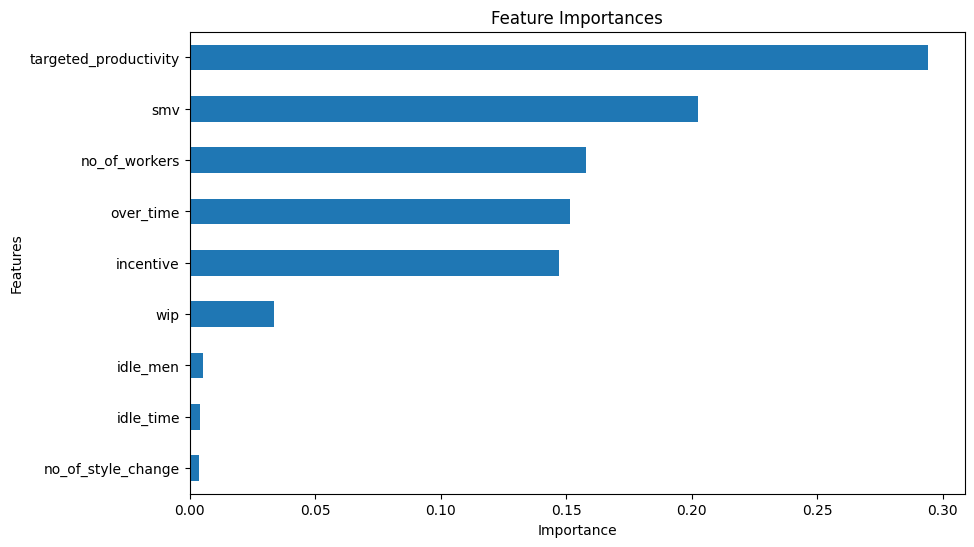

In [243]:
# Visualize feature importance
features = X.columns
importances = pd.Series(feature_importances, index=features)
importances = importances.sort_values()

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


## Assignment 4.5: Analysis of results (2 p)

Let's do a result analysis where you verbally compare the regression results obtained in the assignments 4.2 and 4.4.
* **4.2** (Linear regression) and
* **4.4** (Random Forest regression).

You can use **tables** or **figures** to present results in addition to verbal explanation and analysis.

Comparison of Different Regression Models:

* Compare the regression results of Random Forest and Linear Regression models.
* Is there others good regression methods to apply with this dataset?

<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>



### Comparison of Regression Models

| Metric | Linear Regression | Random Forest Regression | 
|---|---|---|
| Explained Variance | 0.2304 | 0.3687 |
| Maximum Error | 0.6084 | 0.7189 |
| Explained Variance (Weighted) | 0.3687 | 0.3687 |

### Key Observations

1. **Explained Variance**

- The **Random Forest Regression** model has a significantly higher explained variance **(0.3687 vs. 0.2304)** compared to the Linear Regression model.
- This indicates that the **Random Forest model is better at capturing variance** in the dataset, meaning it explains more of the variation in actual productivity.

2. **Maximum Error**

- The **Linear Regression model has a lower maximum error (0.6084 vs. 0.7189)**, suggesting that its worst-case predictions are slightly **more stable**.
- This means that while the Random Forest model is generally more accurate, it may have **larger deviations in certain cases**.

3. **Explained Variance (Weighted)**

- The **weighted explained variance is the same for both models (0.3687)**, suggesting that the overall variance captured across multiple outputs remains consistent.
- However, since the **Random Forest model captures non-linear relationships**, it still **outperforms** Linear Regression in overall predictive performance.

### Feature Importance Analysis
The **feature importance plot** from the Random Forest model highlights the following:

- **Targeted productivity** is the most critical feature.
- **SMV (Standard Minute Value), number of workers, overtime, and incentives** play significant roles.
- **Idle time and idle men have minimal impact**, meaning they contribute little to productivity prediction.

=> This suggests that **Linear Regression may struggle because it assumes a strictly linear relationship**, while **Random Forest can adapt to these varying feature influences**.

### Conclusion: Which Model is Better?

| Criteria | Best Model | Reason | 
|---|---|---|
| Predictive Performance | Random Forest Regression | Higher explained variance |
| Stability (Max Error) | Linear Regression | Lower worst-case error |
| Capturing Non-Linearity | Random Forest Regression | Handles complex relationships better |
| Interpretability | Linear Regression | Easier to explain coefficients |

- If the goal is **high accuracy, Random Forest Regression** is the better choice.
- If **interpretability and simplicity** are key, **Linear Regression** may be preferable.